# GOLEM Example: Shot Data Analysis
This notebook shows a way to get the data from a specific GOLEM shot number.

In [1]:
# Python 3
import configparser as cp
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen, HTTPError
%matplotlib inline

## Convenient Functions

In [2]:
def get_shot_config(shot):
    """
    Get the GOLEM shot configuration.
    
    Parameters
    ----------
    shot :  int
            GOLEM shot number
    
    Returns
    -------
    dict
            GOLEM shot configuration dictionnary
    
    """
    url = f'http://golem.fjfi.cvut.cz/shots/{shot}/data_configuration.cfg'
    try:
        with urlopen(url) as response:
            config_str = response.read().decode('utf-8')
    
        config = cp.RawConfigParser()
        data_types = dict()
        config.read_string(config_str)
        for data_type in config.sections():
            data_types[data_type] = dict(config.items(data_type))
        return data_types
    except HTTPError:
        print('Problem with the network? Can''t open the config file')
        return None

In [3]:
def get_shot_data_dict(shot, signame):
    """
    Returns the data dictionnary of a signal for given shot.
    
    Parameters
    ----------
    shot :  int
            GOLEM shot number
    signame : str
            GOLEM signal name

    Returns
    -------
    data : Numpy npz format Data
            GOLEM signal data

    """
    baseURL = "http://golem.fjfi.cvut.cz/utils/data/"
    url = baseURL + str(shot) +'/' + signame + '.npz'
    print(f'Openning {url} ...')
    # The source file gets downloaded and saved into a temporary directory 
    ds = np.DataSource()
    return np.load(ds.open(url, mode='br'))# as npz: # Python 3 needs to open the file in binary mode  

In [4]:
def dict_to_y(data_dict):
    """
    Returns time data arrays (y, t) from a GOLEM signal data.
    
    Parameters
    ----------
    data_dict : dict
            GOLEM signal data.
    
    Returns
    -------
    t : Numpy array
        time data
    y : Numpy array
        data array

    """
    y = data_dict['data']
    t = np.linspace(data_dict['t_start'], data_dict['t_end'], len(y))
    return t, y

## Usage Example

In [5]:
shot = 22667

In [6]:
cfg = get_shot_config(shot)

Openning http://golem.fjfi.cvut.cz/utils/data/22667/irog.npz ...


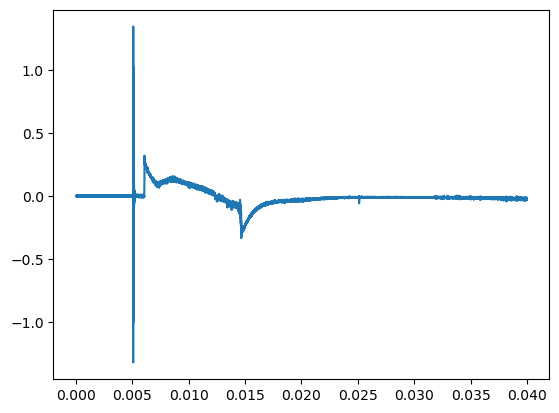

In [7]:
irog = get_shot_data_dict(shot, 'irog')
t, _irog = dict_to_y(irog)
plt.plot(t, _irog)

### Gas Pressure

In [8]:
# Gas Pressure
pressure = get_shot_data_dict(shot, 'pressure')['data'] # mPa
print(pressure)

Openning http://golem.fjfi.cvut.cz/utils/data/22667/pressure.npz ...
20.6484287318


### Gas Specie

In [9]:
# Gas Specie
gas = get_shot_data_dict(shot, 'working_gas')['data']
print(gas)

Openning http://golem.fjfi.cvut.cz/utils/data/22667/working_gas.npz ...
H


### Plasma Lifetime

In [10]:
# Plasma lifetime
is_plasma = get_shot_data_dict(shot, 'plasma')['data'] # 1 or 0
t_plasma = get_shot_data_dict(shot, 'plasma_life')['data']

Openning http://golem.fjfi.cvut.cz/utils/data/22667/plasma.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/plasma_life.npz ...


### Voltages and Times

In [11]:
ub, ubd, ucd, ust = get_shot_data_dict(shot, 'ub')['data'], get_shot_data_dict(shot, 'ubd')['data'], get_shot_data_dict(shot, 'ucd')['data'], get_shot_data_dict(shot, 'ust')['data']
tb, tbd, tcd, tst = get_shot_data_dict(shot, 'tb')['data'], get_shot_data_dict(shot, 'tbd')['data'], get_shot_data_dict(shot, 'tcd')['data'], get_shot_data_dict(shot, 'tst')['data'], 


Openning http://golem.fjfi.cvut.cz/utils/data/22667/ub.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/ubd.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/ucd.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/ust.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/tb.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/tbd.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/tcd.npz ...
Openning http://golem.fjfi.cvut.cz/utils/data/22667/tst.npz ...


In [12]:
print(pressure, gas, t_plasma)
print(ub, ubd, ucd, ust)
print(tb, tbd, tcd, tst)

20.6484287318 H 0.00754
600.0 0.0 500.0 0.0
0.005 0.005 0.006 0.005
